In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
df = pd.read_csv("./SMU_Bootcamp_Project-1/california_wildfire_data_cleaned.csv")

In [11]:
df["County"].value_counts().head(10)

County
Riverside          288
San Diego          155
Kern               145
Fresno             120
Los Angeles        110
San Luis Obispo    104
San Bernardino     103
Butte               94
Shasta              91
Siskiyou            87
Name: count, dtype: int64

In [13]:
Freq_Counties_DF = df[(df['County'] == 'Riverside') | (df['County'] == 'Kern') | (df['County'] == 'San Diego') |
                (df['County'] == 'Fresno') | (df['County'] == 'Los Angeles') | (df['County'] == 'San Bernardino') | 
                (df['County'] == 'Siskiyou') | (df['County'] == 'Shasta') | (df['County'] == 'Butte')  | 
                (df['County'] == 'San Luis Obispo')]
Freq_Counties_DF

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
6,6,Summit Fire,Riverside,CAL FIRE/Riverside County Fire,2956.0,36.0,5.0,62.0,0.0,5.0,...,726.0,0.0,1.0,0.0,7.0,2013-05-01T12:38:00Z,2013-05-04T18:30:00Z,-116.941311,34.288877,a1b14be5-a8cf-4e40-8588-96becf4c5879
9,9,Gorgonio Fire,Riverside,CAL FIRE/Riverside County Fire,650.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-05-04T11:43:00Z,2013-05-05T18:45:00Z,-116.855019,33.894055,958ce6d2-97f9-4848-8620-d14ab87f329d
10,10,Lytle Fire,San Bernardino,"USFS San Bernardino National Forest, CAL FIRE ...",75.0,13.0,0.0,21.0,0.0,0.0,...,292.0,0.0,1.0,0.0,13.0,2013-05-13T13:30:00Z,2013-05-15T08:15:00Z,-117.440800,34.183400,e2c4b308-9a2d-483b-8434-999bef9adc7c
12,12,54 Fire,Riverside,CAL FIRE Riverside Unit,40.0,0.0,1.0,19.0,0.0,0.0,...,65.0,0.0,0.0,0.0,0.0,2013-05-16T13:48:00Z,2013-05-17T08:30:00Z,-116.161201,33.655638,e215290f-d0b4-48fd-be32-f599959347b1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,2773,Sepulveda Fire,Los Angeles,LA City Fire Department,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23T00:36:20Z,2025-01-24T00:00:00Z,-118.475410,34.096800,0434262e-c6ca-4232-a2b4-ad0f5589b036
2775,2775,Border 2 Fire,San Diego,Unified Command: CAL FIRE San Diego Unit & San...,6625.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23T13:58:00Z,2025-02-20 10:24:04+00:00,-116.843700,32.594700,a9719e0a-db5d-48d4-895c-5b096ae1802d
2776,2776,Gilman Fire,San Diego,San Diego City Fire,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23T14:42:58Z,2025-01-24T00:00:00Z,-117.237000,32.862200,22ec23e5-b380-4ee4-942f-26c12a4576d7
2777,2777,Gibbel Fire,Riverside,CAL FIRE Riverside Unit,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2025-01-23T16:40:30Z,2025-01-24T00:00:00Z,-116.964339,33.708601,a79b51d3-9ae7-4ec3-a8ca-9f733b89df9a


In [15]:
County_Sum = Freq_Counties_DF.groupby(['County'])['Acres Burned'].sum()
County_Sum

County
Butte              268023.0
Fresno             305938.0
Kern               245168.0
Los Angeles        199566.0
Riverside          191157.0
San Bernardino     240061.0
San Diego           94291.0
San Luis Obispo    110371.0
Shasta             185095.0
Siskiyou           722117.0
Name: Acres Burned, dtype: float64

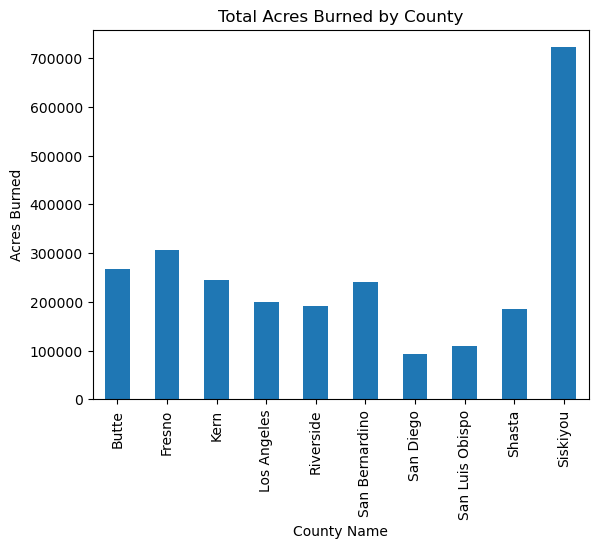

In [27]:
panda_plot = County_Sum.plot.bar()
panda_plot.set_xlabel("County Name")
panda_plot.set_ylabel("Acres Burned")
panda_plot.set_title("Total Acres Burned by County")

plt.savefig("SMU_Bootcamp_Project-1/Output_Data/Acres Burned by County_PC.png")

In [19]:
County_Ppl = Freq_Counties_DF.groupby(['County'])['Personnel Involved'].sum()
County_Ppl

County
Butte              5135.0
Fresno             1534.0
Kern                502.0
Los Angeles        1367.0
Riverside          3874.0
San Bernardino     3246.0
San Diego          7278.0
San Luis Obispo    1958.0
Shasta             2312.0
Siskiyou           1367.0
Name: Personnel Involved, dtype: float64

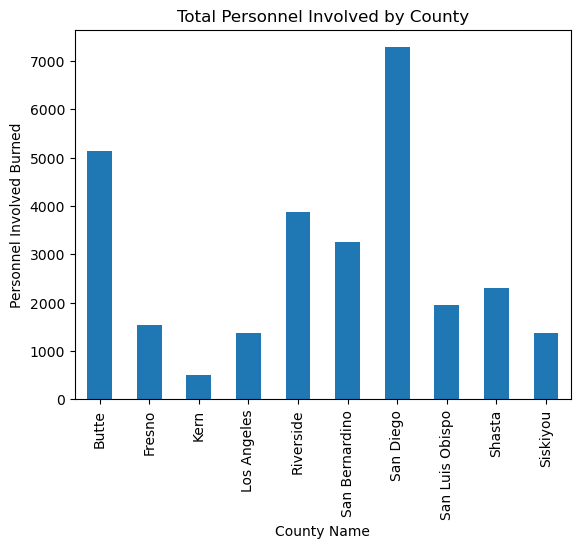

In [29]:
panda_plot = County_Ppl.plot.bar()
panda_plot.set_xlabel("County Name")
panda_plot.set_ylabel("Personnel Involved Burned")
panda_plot.set_title("Total Personnel Involved by County")

plt.savefig("SMU_Bootcamp_Project-1/Output_Data/Total Personnel Involved by County_PC.png")

In [23]:
def linear_regression_plot(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    
    y_axis = list(map((lambda x_valus: slope * x_valus + intercept), x))

    plt.plot(x, y_axis, color= 'blue')

    equation = f"y={slope:.2f}x + {intercept:.2f}"
    plt.text(min(x),min(y), equation, fontsize= 15, color='blue', verticalalignment='top')

    print(f'The r^2 value is: {np.square(r)}')

The r^2 value is: 0.2746289159818175


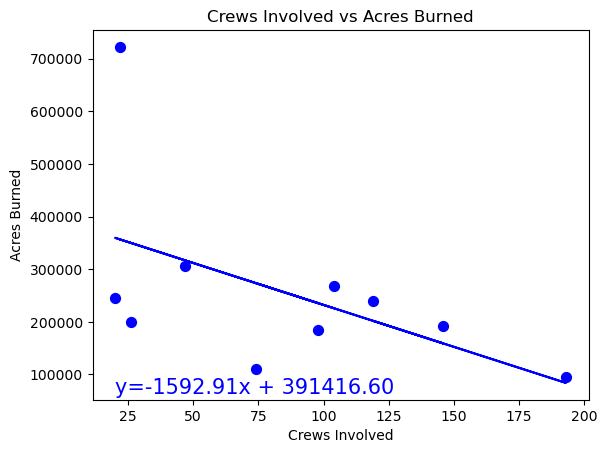

<Figure size 640x480 with 0 Axes>

In [31]:
x = Freq_Counties_DF.groupby(['County'])['Crews Involved'].sum()
y = Freq_Counties_DF.groupby(['County'])['Acres Burned'].sum()


plt.scatter(x, y, color='blue', marker='o', s=50)

linear_regression_plot(x, y)
plt.xlabel("Crews Involved")
plt.ylabel("Acres Burned")
plt.title("Crews Involved vs Acres Burned")
plt.show()

plt.savefig("SMU_Bootcamp_Project-1/Output_Data/Crews Involved vs Acres Burned_PC.png")